# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할 때 보다 어렵다
- Keras는 머신러닝 라이브러리 테아노(Theano)와 Tensorflow를 Wrapping한 라이브러리

In [141]:
import pandas as pd
train = pd.read_csv('data/train_20k.csv', header=None)
test = pd.read_csv('data/test_1k.csv', header=None)
print(train.shape)
print(train.head())
print(test.head())
print(train.count())

(20001, 785)
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0  

---
## Preprocessing(전처리)

In [142]:
# null check
print(train.isnull().sum()) # column이 너무 많아 안 보임 > 한번 더 sum
print(train.isnull().sum().sum())

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64
0


In [143]:
print(test.isnull().sum().sum())

0


In [144]:
# train과 test를 Feature와 Target으로 분리
train_data = train.iloc[:, 1:]
# train_label = train.iloc[:, train.columns != 0]
train_label = train.iloc[:, 0]
# train_label = train.iloc[:, train.columns == 0]

test_data = test.iloc[:, 1:]
test_label = test.iloc[:, 0]

In [145]:
print(train_data.shape)

(20001, 784)


In [146]:
# 최대값으로 나눠 정규화
train_data = train_data / 255
test_data = test_data / 255

In [147]:
# 데이터 확인
print(train_data[0:5])
print(train_label[0:5])
print(test_data[0:5])
print(test_label[0:5])

   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0

## Deep Learning Model 만들기

In [148]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" # warning message 줄임

In [149]:
from tensorflow import keras

In [150]:
# data shape
print(train_data.shape)

(20001, 784)


In [151]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=512,  activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [152]:
from pickletools import optimize
from sklearn import metrics

model.compile(
    optimizer='adam', # sgd
    metrics='accuracy',
    loss='sparse_categorical_crossentropy') # 정수: sparse

In [153]:
train_data.shape
train_label.shape

(20001,)

In [154]:
# 데이터 훈련하기
import numpy as np

model.fit(
  np.array(train_data),
  np.array(train_label),
  epochs=17,
)

Epoch 1/17
626/626 [==============================] - 3s 4ms/step - loss: 0.3141 - accuracy: 0.9079
Epoch 2/17
626/626 [==============================] - 2s 4ms/step - loss: 0.1278 - accuracy: 0.9624
Epoch 3/17
626/626 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9770
Epoch 4/17
626/626 [==============================] - 2s 4ms/step - loss: 0.0547 - accuracy: 0.9840
Epoch 5/17
626/626 [==============================] - 2s 4ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 6/17
626/626 [==============================] - 2s 3ms/step - loss: 0.0249 - accuracy: 0.9929
Epoch 7/17
626/626 [==============================] - 2s 4ms/step - loss: 0.0148 - accuracy: 0.9966
Epoch 8/17
626/626 [==============================] - 2s 4ms/step - loss: 0.0153 - accuracy: 0.9957
Epoch 9/17
626/626 [==============================] - 2s 4ms/step - loss: 0.0104 - accuracy: 0.9969
Epoch 10/17
626/626 [==============================] - 2s 4ms/step - loss: 0.0127 - accuracy: 0.9962

In [155]:
# 테스트 데이터로 평가하기
score = model.evaluate(train_data,  np.array(train_label))
print('loss', score[0])
print('accuracy', score[1])

626/626 [==============================] - 2s 2ms/step - loss: 0.0155 - accuracy: 0.9951
loss 0.015487351454794407
accuracy 0.9950502514839172


---
## 테스트 데이터로 평가하기

In [156]:
score = model.evaluate(test_data,  np.array(test_label))
print('loss', score[0])
print('accuracy', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9710
loss 0.13310042023658752
accuracy 0.9710289835929871


---
## test_data로 predict하기

In [157]:
pred = model.predict(test_data)
print('test label: ', test_label[:10])

32/32 [==============================] - 0s 2ms/step
test label:  0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: int64


In [158]:
pred[:10]

array([[7.71337848e-17, 3.58332027e-17, 2.79000645e-13, 4.58540411e-12,
        2.11539413e-22, 2.80790207e-20, 2.49549028e-24, 1.00000000e+00,
        3.21433210e-19, 2.15511612e-16],
       [2.09042961e-12, 5.95175095e-07, 9.99998569e-01, 7.80624987e-07,
        2.17983321e-25, 5.24657303e-13, 6.48835708e-14, 3.62994117e-17,
        2.47058911e-13, 4.30781155e-20],
       [2.72463822e-11, 9.99659538e-01, 1.35814425e-05, 1.18112613e-08,
        1.67831942e-07, 7.03121898e-08, 5.44932588e-09, 3.26609006e-04,
        1.77919866e-08, 1.10997482e-10],
       [1.00000000e+00, 2.22428205e-16, 5.27308162e-11, 7.10425439e-14,
        5.89056663e-14, 2.86438141e-16, 1.86770666e-09, 3.13306076e-10,
        3.94649318e-19, 5.02518374e-11],
       [2.71586811e-12, 1.07484849e-13, 1.41019514e-11, 9.24129696e-13,
        9.99995112e-01, 5.20779658e-15, 1.49564259e-12, 1.89965860e-07,
        2.87380211e-12, 4.62073376e-06],
       [9.10587015e-15, 9.99923468e-01, 2.20524501e-10, 1.41554823e-11,
   

> 보기 더럽다

In [159]:
# max값을 가지는 인덱스를 추출
pred_label = np.argmax(pred, axis=1)
print('pred label: ', pred_label[:10])

pred label:  [7 2 1 0 4 1 4 9 6 9]


##### argmax의 사용

In [160]:
np.argmax([1,4,3,2]) # 1번째(4)가 가장 크다 > 1 반환

1

---
# 번외: Image 만들기

In [161]:
from PIL import Image

In [162]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:, train.columns != 0]
train1.shape

(20001, 784)

In [163]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [164]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [165]:
# 이미지 저장하기
image.save('data/train_50.png')

---
# 이미지를 불러서 predict 해보기

In [166]:
# image 불러오기
img = Image.open('data/train_50.png')
img

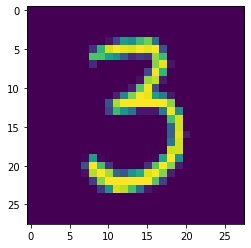

In [167]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [168]:
# image를 numpy로 변환하기
imgArray = np.array(img)
imgArray.shape

(28, 28)

In [169]:
# 255로 나눠 정규화하고 1차원 배열로 바꾸기
imgArray = imgArray / 255.0
imgArray2 = imgArray.reshape(-1) # 알아서 계산해서 1차원으로 만들기
imgArray2.shape

(784,)

In [170]:
# dataframe으로 만들기 위해 python list로 만들기
imgArray3 = imgArray2.tolist()

dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
print('예측값:', np.argmax(model.predict(dfArray), axis=1))

1/1 [==============================] - 0s 20ms/step
예측값: [3]


In [172]:
model.predict(dfArray)

1/1 [==============================] - 0s 19ms/step


array([[1.4669040e-11, 1.6760914e-07, 4.5049820e-08, 9.9998093e-01,
        2.2433303e-13, 2.0409843e-06, 2.1198373e-14, 2.3136709e-10,
        2.6135644e-10, 1.6816248e-05]], dtype=float32)